In [1]:
%%capture
!npm install vis-utils
!pip install scikit-plot
from tensorflow.keras.utils import plot_model

In [2]:
%%capture
!pip install scikit-plot
!pip install keras
!pip install tensorflow
!pip install keras-vis
import pandas as pd
import numpy as np
import scikitplot
import random
import seaborn as sns
import keras
import os
from matplotlib import pyplot
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import warnings
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras import regularizers
from tensorflow.python.keras.utils import tf_utils
from keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.utils import plot_model
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D,Activation,Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
warnings.simplefilter("ignore")
from keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.regularizers import l1, l2
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
data=pd.read_csv('fer2013.csv')
data.shape

(35887, 3)

In [4]:
data.isnull().sum()

emotion    0
pixels     0
Usage      0
dtype: int64

In [5]:
data.head()

emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training

In [6]:
CLASS_LABELS  = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sadness', "Surprise"]
fig = px.bar(x = CLASS_LABELS,
             y = [list(data['emotion']).count(i) for i in np.unique(data['emotion'])] , 
             color = np.unique(data['emotion']) ,
             color_continuous_scale="Viridis") 
fig.update_xaxes(title="Emotions")
fig.update_yaxes(title = "Number of Images")
fig.update_layout(showlegend = True,
    title = {'text': 'Train Data Distribution ','y':0.95,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.show()

In [7]:
data=data.sample(frac=1)

In [8]:
labels=to_categorical(data[['emotion']],num_classes=7)

In [9]:
train_pixels=data["pixels"].astype(str).str.split(" ").tolist()
train_pixels=np.uint8(train_pixels)

In [10]:
pixels=train_pixels.reshape((35887*2304,1))

In [11]:
scaler=StandardScaler()
pixels=scaler.fit_transform(pixels)

In [12]:
pixels=train_pixels.reshape((35887,48,48,1))

In [13]:
X_train,X_test,y_train,y_test=train_test_split(pixels,labels,test_size=0.1,shuffle=False)

In [14]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,shuffle=False)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(29068, 48, 48, 1)
(3589, 48, 48, 1)
(3230, 48, 48, 1)


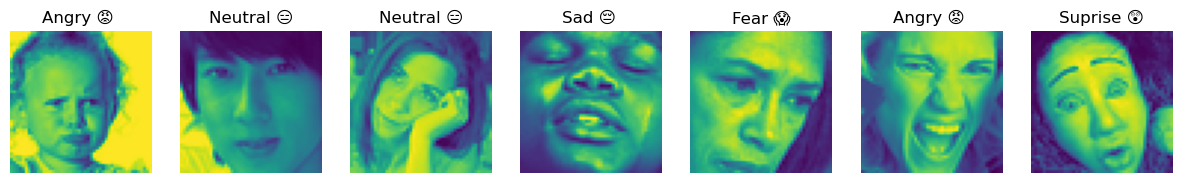

In [16]:
plt.figure(figsize=(15,23))
label_dict={0:'Angry 😡 ',1:'Disgust 🤢 ',2:'Fear 😱',3:'Happiness😊',4:'Sad 😔 ',5:'Suprise 😲',6:'Neutral 😑'}
i=1
for i in range(7):
    img=np.squeeze(X_train[i])
    plt.subplot(1,7,i+1)
    plt.imshow(img)
    index=np.argmax(y_train[i])
    plt.title(label_dict[index])
    plt.axis('off')
    i+=1
plt.show()

In [17]:
datagen=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True,zoom_range=0.2)

In [18]:
valgen=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True,zoom_range=0.2)

In [19]:
datagen.fit(X_train)
valgen.fit(X_val)

In [20]:
train_generator=datagen.flow(X_train,y_train,batch_size=64)
val_generator=datagen.flow(X_val,y_val,batch_size=64)

In [21]:
def cnn_model():

  model= tf.keras.models.Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
  model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
      
  model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten()) 
  model.add(Dense(256,activation = 'relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))
      
  model.add(Dense(512,activation = 'relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))

  model.add(Dense(7, activation='softmax'))
  model.compile(
    optimizer = Adam(lr=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])
  return model

In [24]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       2

In [27]:
checkpointer = [EarlyStopping(monitor = 'val_accuracy', verbose = 1, restore_best_weights=True,mode="max",patience = 5),ModelCheckpoint('best_model.h5',monitor="val_accuracy",verbose=1,save_best_only=True,mode="max")]

In [29]:
history = model.fit(train_generator,epochs=30,batch_size=64,verbose=1,callbacks=[checkpointer],validation_data=val_generator)

Epoch 1/30
455/455 [==============================] - ETA: 0s - loss: 6.5081 - accuracy: 0.2194
Epoch 1: val_accuracy improved from -inf to 0.21393, saving model to best_model.h5
455/455 [==============================] - 469s 1s/step - loss: 6.5081 - accuracy: 0.2194 - val_loss: 2.8124 - val_accuracy: 0.2139
Epoch 2/30
455/455 [==============================] - ETA: 0s - loss: 2.5997 - accuracy: 0.2848
Epoch 2: val_accuracy improved from 0.21393 to 0.28731, saving model to best_model.h5
455/455 [==============================] - 615s 1s/step - loss: 2.5997 - accuracy: 0.2848 - val_loss: 2.7086 - val_accuracy: 0.2873
Epoch 3/30
455/455 [==============================] - ETA: 0s - loss: 2.6023 - accuracy: 0.3489
Epoch 3: val_accuracy improved from 0.28731 to 0.30867, saving model to best_model.h5
455/455 [==============================] - 575s 1s/step - loss: 2.6023 - accuracy: 0.3489 - val_loss: 2.8462 - val_accuracy: 0.3087
Epoch 4/30
455/455 [==============================] - ETA: 0s

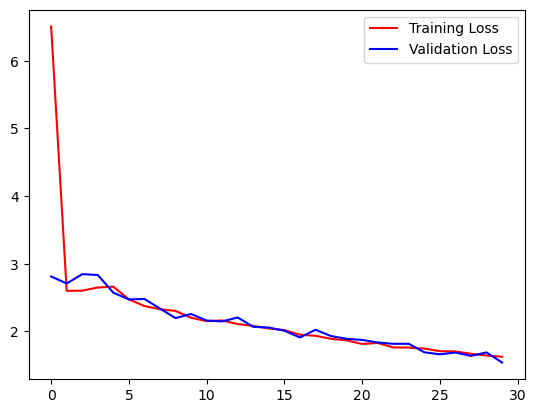

In [30]:
plt.plot(history.history["loss"],'r', label="Training Loss")
plt.plot(history.history["val_loss"],'b', label="Validation Loss")
plt.legend()

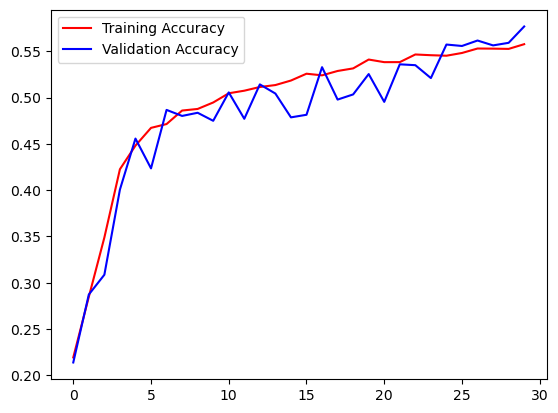

In [31]:
plt.plot(history.history["accuracy"],'r',label="Training Accuracy")
plt.plot(history.history["val_accuracy"],'b',label="Validation Accuracy")
plt.legend()

In [32]:
loss = model.evaluate(X_test,y_test) 
print("Test Acc: " + str(loss[1]))

113/113 [==============================] - 20s 172ms/step - loss: 1.5192 - accuracy: 0.5879
Test Acc: 0.5879074931144714


In [33]:
preds = model.predict(X_test)
y_pred = np.argmax(preds , axis = 1 )

113/113 [==============================] - 20s 168ms/step


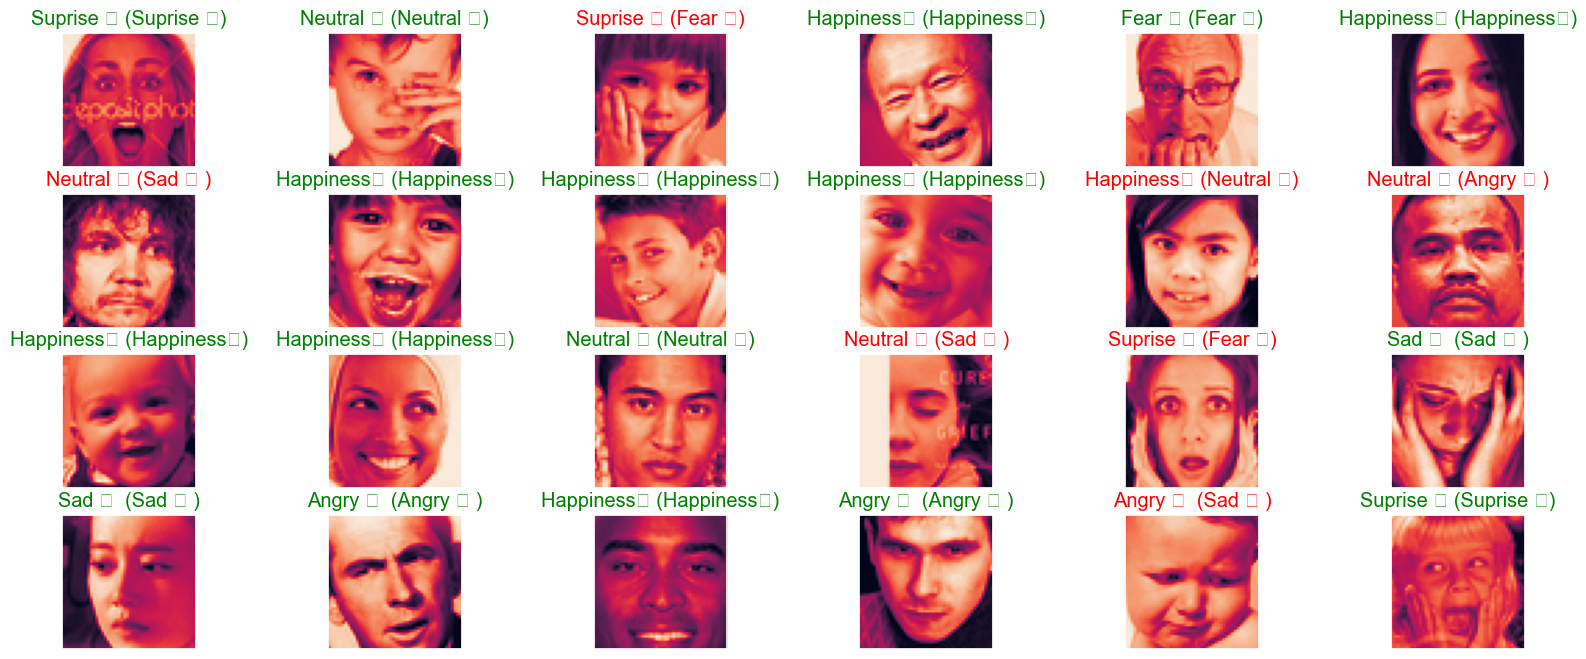

In [56]:
label_dict = {0:'Angry 😡 ',1:'Disgust 🤢 ',2:'Fear 😱',3:'Happiness😊',4:'Sad 😔 ',5:'Suprise 😲',6:'Neutral 😑'}

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=24, replace=False)):
    ax = figure.add_subplot(4, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = label_dict[(y_pred[index])]
    true_index = label_dict[np.argmax(y_test,axis=1)[index]]
    
    ax.set_title("{} ({})".format((predict_index), (true_index)),color=("green" if predict_index == true_index else "red"))

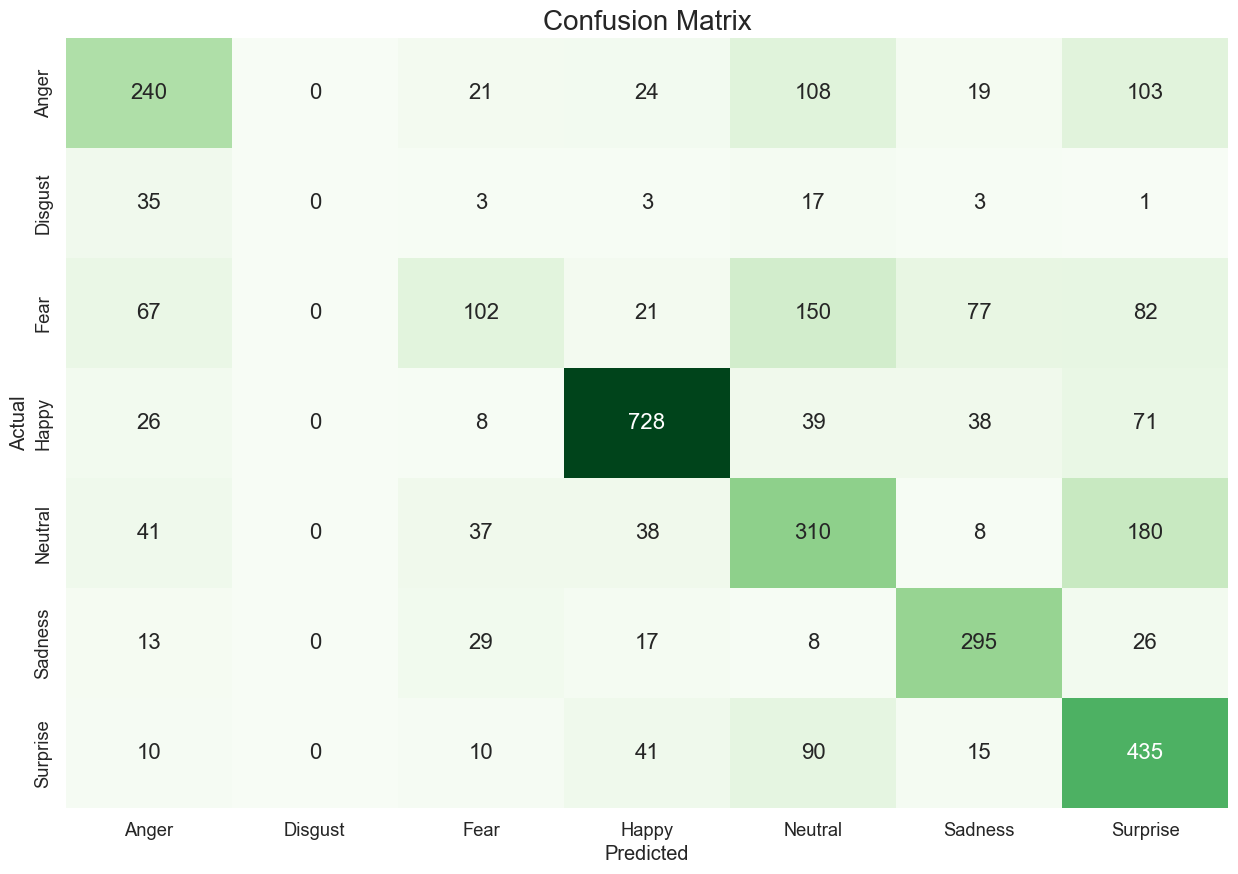

In [38]:
CLASS_LABELS  = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sadness', "Surprise"]

cm_data = confusion_matrix(np.argmax(y_test, axis = 1 ), y_pred)
cm = pd.DataFrame(cm_data, columns=CLASS_LABELS, index = CLASS_LABELS)

cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (15,10))
plt.title('Confusion Matrix', fontsize = 20)
sns.set(font_scale=1.2)
ax = sns.heatmap(cm, cbar=False, cmap="Greens", annot=True, annot_kws={"size": 16}, fmt='g')

In [39]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis = 1 ),y_pred,digits=3))

              precision    recall  f1-score   support

           0      0.556     0.466     0.507       515
           1      0.000     0.000     0.000        62
           2      0.486     0.204     0.288       499
           3      0.835     0.800     0.817       910
           4      0.429     0.505     0.464       614
           5      0.648     0.760     0.700       388
           6      0.484     0.724     0.580       601

    accuracy                          0.588      3589
   macro avg      0.491     0.494     0.479      3589
weighted avg      0.584     0.588     0.572      3589



In [40]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.001),loss='categorical_crossentropy',metrics = ['accuracy'])

In [42]:
history = model.fit(train_generator,epochs=30,batch_size=64,   verbose=1,callbacks=[checkpointer],validation_data=val_generator)

Epoch 1/30
455/455 [==============================] - ETA: 0s - loss: 1.5603 - accuracy: 0.5721
Epoch 1: val_accuracy improved from 0.57678 to 0.58916, saving model to best_model.h5
455/455 [==============================] - 558s 1s/step - loss: 1.5603 - accuracy: 0.5721 - val_loss: 1.5166 - val_accuracy: 0.5892
Epoch 2/30
455/455 [==============================] - ETA: 0s - loss: 1.5377 - accuracy: 0.5768
Epoch 2: val_accuracy did not improve from 0.58916
455/455 [==============================] - 541s 1s/step - loss: 1.5377 - accuracy: 0.5768 - val_loss: 1.5085 - val_accuracy: 0.5842
Epoch 3/30
455/455 [==============================] - ETA: 0s - loss: 1.5249 - accuracy: 0.5801
Epoch 3: val_accuracy did not improve from 0.58916
455/455 [==============================] - 515s 1s/step - loss: 1.5249 - accuracy: 0.5801 - val_loss: 1.4893 - val_accuracy: 0.5842
Epoch 4/30
455/455 [==============================] - ETA: 0s - loss: 1.5119 - accuracy: 0.5805
Epoch 4: val_accuracy did not im

In [43]:
loss = model.evaluate(X_test,y_test) 
print("Test Acc: " + str(loss[1]))

113/113 [==============================] - 9s 74ms/step - loss: 1.4023 - accuracy: 0.6002
Test Acc: 0.6001671552658081


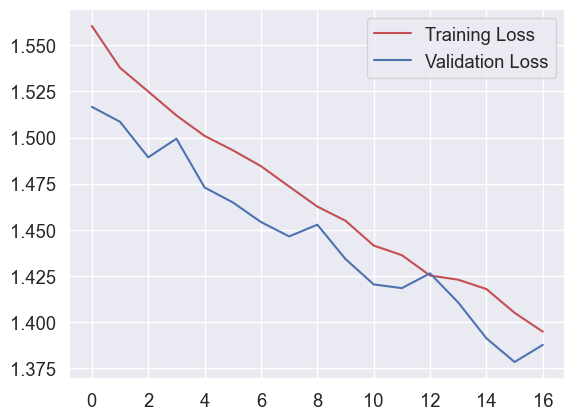

In [44]:
plt.plot(history.history["loss"],'r', label="Training Loss")
plt.plot(history.history["val_loss"],'b', label="Validation Loss")
plt.legend()

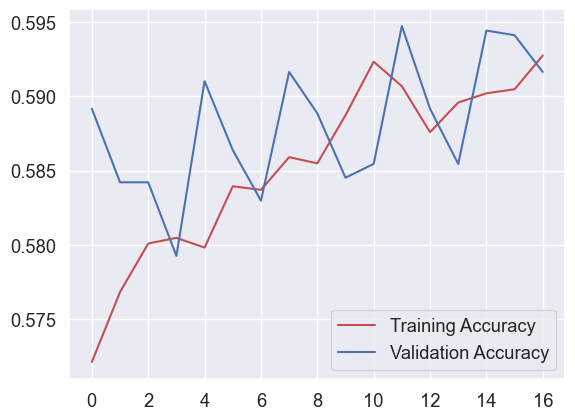

In [45]:
plt.plot(history.history["accuracy"],'r',label="Training Accuracy")
plt.plot(history.history["val_accuracy"],'b',label="Validation Accuracy")
plt.legend()

In [46]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
checkpointer = [EarlyStopping(monitor = 'val_accuracy', verbose = 1, restore_best_weights=True,mode="max",patience = 10),ModelCheckpoint('best_model.h5',monitor="val_accuracy",verbose=1,save_best_only=True,mode="max")]

In [48]:
history = model.fit(train_generator,epochs=50,batch_size=64,   verbose=1,callbacks=[checkpointer],validation_data=val_generator)

Epoch 1/50
455/455 [==============================] - ETA: 0s - loss: 1.3265 - accuracy: 0.5903
Epoch 1: val_accuracy improved from -inf to 0.59598, saving model to best_model.h5
455/455 [==============================] - 268s 586ms/step - loss: 1.3265 - accuracy: 0.5903 - val_loss: 1.2516 - val_accuracy: 0.5960
Epoch 2/50
455/455 [==============================] - ETA: 0s - loss: 1.2570 - accuracy: 0.5947
Epoch 2: val_accuracy improved from 0.59598 to 0.59783, saving model to best_model.h5
455/455 [==============================] - 299s 658ms/step - loss: 1.2570 - accuracy: 0.5947 - val_loss: 1.2164 - val_accuracy: 0.5978
Epoch 3/50
455/455 [==============================] - ETA: 0s - loss: 1.2287 - accuracy: 0.5958
Epoch 3: val_accuracy improved from 0.59783 to 0.60402, saving model to best_model.h5
455/455 [==============================] - 301s 661ms/step - loss: 1.2287 - accuracy: 0.5958 - val_loss: 1.1958 - val_accuracy: 0.6040
Epoch 4/50
455/455 [==============================] 

In [49]:
loss = model.evaluate(X_test,y_test) 
print("Test Acc: " + str(loss[1]))

113/113 [==============================] - 8s 69ms/step - loss: 1.0896 - accuracy: 0.6453
Test Acc: 0.6453050971031189


In [50]:
preds = model.predict(X_test)
y_pred = np.argmax(preds , axis = 1 )

113/113 [==============================] - 8s 70ms/step


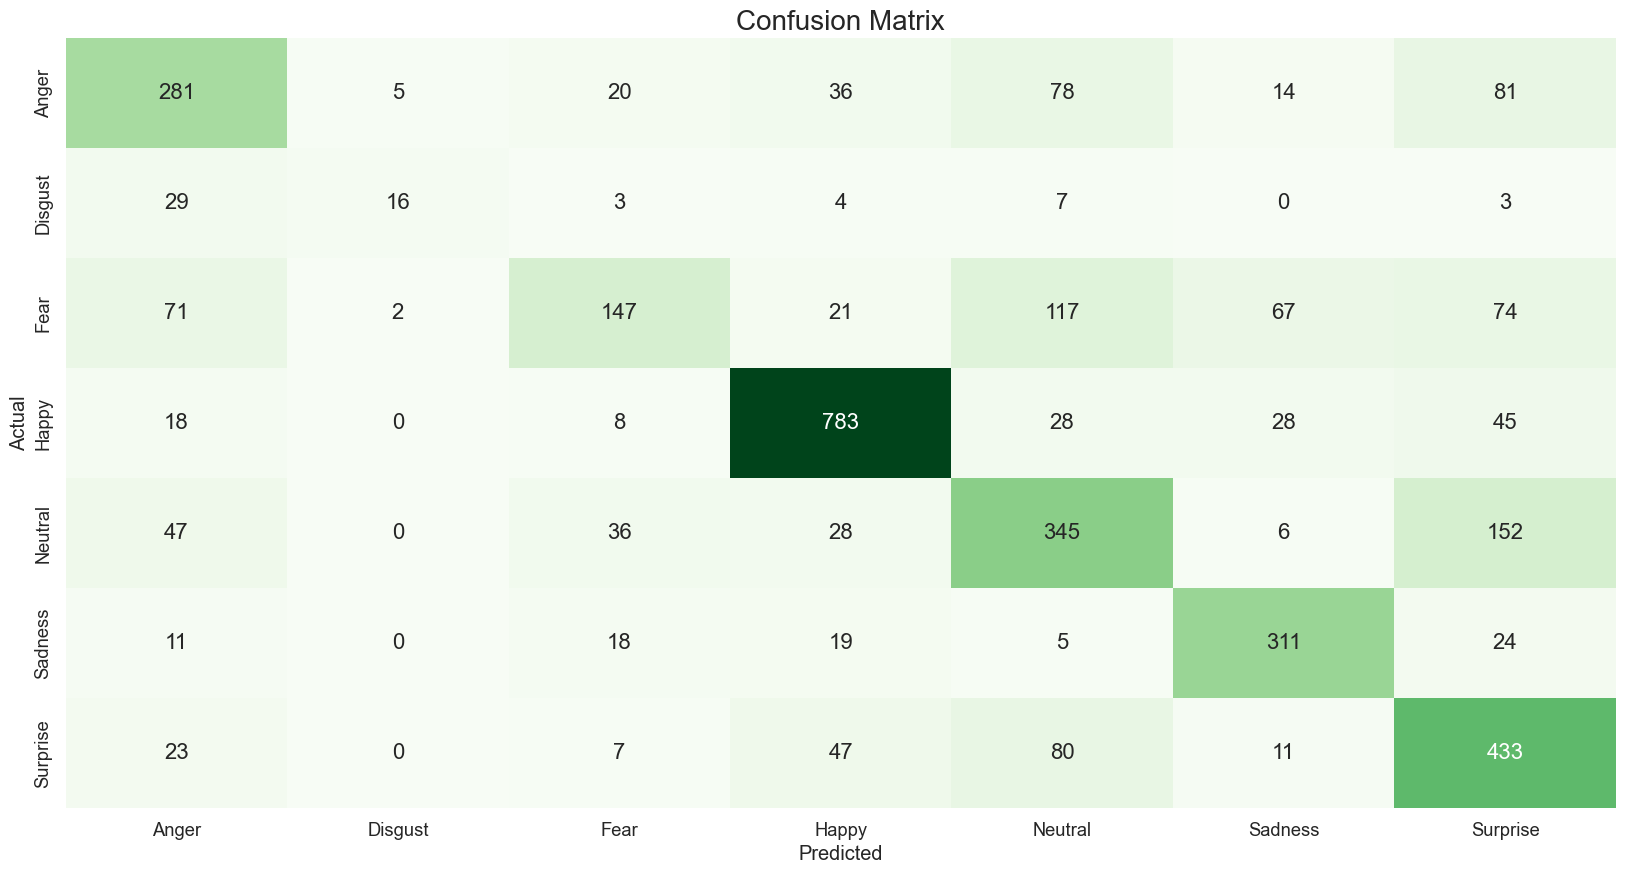

In [53]:
CLASS_LABELS  = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sadness', "Surprise"]

cm_data = confusion_matrix(np.argmax(y_test, axis = 1 ), y_pred)
cm = pd.DataFrame(cm_data, columns=CLASS_LABELS, index = CLASS_LABELS)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (20,10))
plt.title('Confusion Matrix', fontsize = 20)
sns.set(font_scale=1.2)
ax = sns.heatmap(cm, cbar=False, cmap="Greens", annot=True, annot_kws={"size": 16}, fmt='g')

In [52]:
print(classification_report(np.argmax(y_test, axis = 1 ),y_pred,digits=3))

              precision    recall  f1-score   support

           0      0.585     0.546     0.565       515
           1      0.696     0.258     0.376        62
           2      0.615     0.295     0.398       499
           3      0.835     0.860     0.847       910
           4      0.523     0.562     0.542       614
           5      0.712     0.802     0.754       388
           6      0.533     0.720     0.613       601

    accuracy                          0.645      3589
   macro avg      0.643     0.578     0.585      3589
weighted avg      0.649     0.645     0.635      3589



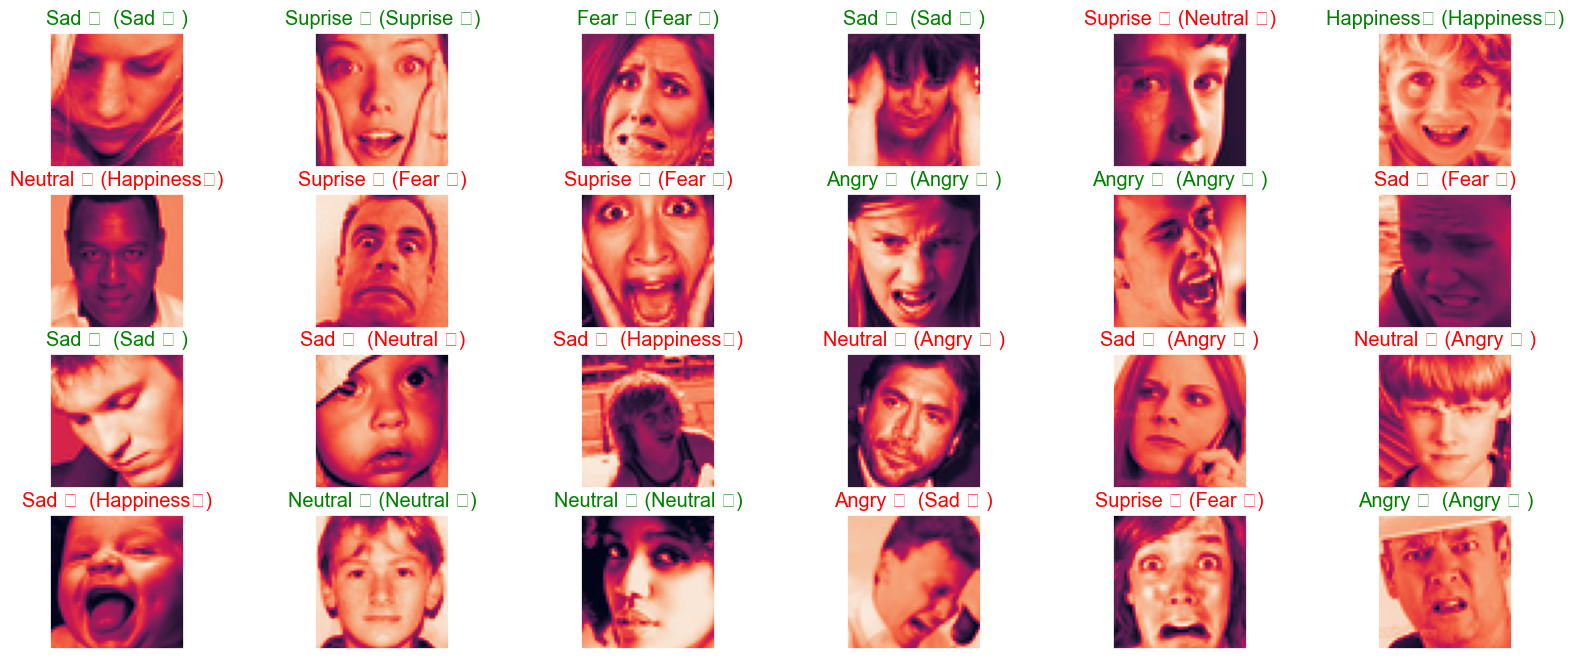

In [57]:
label_dict = {0:'Angry 😡 ',1:'Disgust 🤢 ',2:'Fear 😱',3:'Happiness😊',4:'Sad 😔 ',5:'Suprise 😲',6:'Neutral 😑'}

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=24, replace=False)):
    ax = figure.add_subplot(4, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = label_dict[(y_pred[index])]
    true_index = label_dict[np.argmax(y_test,axis=1)[index]]
    
    ax.set_title("{} ({})".format((predict_index), (true_index)),color=("green" if predict_index == true_index else "red"))